In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_columns = 50

Берем среднее за рабочий день, если отклоняется в 2 раза+ - на проверку

Посчитать кол-во одинаковых запросов

Поиск часов, когда  посылается много одинаковых запросов

Крайний срок устанавливается вручную или как?

In [2]:
train = pd.read_csv('data/train.csv',
                    parse_dates=['Дата закрытия обращения',
                                 'Дата восстановления',
                                 'Дата обращения',
                                 'Крайний срок']).rename({'Решение             ': 'Решение'}, axis=1)
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/submission.csv')

train['month'] = (train['Дата обращения'].dt.month - train['Дата восстановления'].dt.month.min()).astype(np.int8)
train['day'] = train['month'] * 31 + train['Дата обращения'].dt.day
train['hour'] = train['day'] * 24 + train['Дата обращения'].dt.hour
train['num_of_week'] = train['Дата обращения'].dt.day_of_week

train['Приоритет_num'] = train['Приоритет'].apply(lambda x: int(x[0]))
train['Критичность_num'] = train['Критичность'].apply(lambda x: int(x[0]))
train['Влияние_num'] = train['Влияние'].apply(lambda x: int(x[0]))


train = train[(train['day']>= 26)&(train['num_of_week']>=2)]
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,month,day,hour,num_of_week,Приоритет_num,Критичность_num,Влияние_num
13,Заблокировать учетную запись пользователя Сист...,Сервис21,2-Средний,Закрыт,ФГ283,2018-01-31 07:51:00,2018-01-26 00:11:00,Запрос,Запрос,Дана консультация,0,2018-01-26 00:49:00,2018-02-02 07:52:00,1-Особая,4-Нет влияния,Система21,Место257,0,26,624,4,2,1,4
14,Многочисленные обращения пользователей. Отсутс...,Сервис347,3-Низкий,Закрыт,ФГ136,2018-01-28 12:36:00,2018-01-26 00:35:00,Инцидент,Инцидент,Сбой репликации данных на сервера Система304 с...,0,2018-01-26 03:26:00,2018-02-02 09:37:00,4-Нет,2-Значительное,Система304,Место1,0,26,624,4,3,4,2
15,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-26 00:41:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-26 00:41:00,2018-01-26 08:47:00,1-Особая,3-Малое,Система7,Место222,0,26,624,4,2,1,3
16,Штатное отключение УЗ,Сервис7,2-Средний,Закрыт,ФГ528,2018-01-31 07:51:00,2018-01-26 00:43:00,Запрос,Запрос,Исполнено,0,2018-01-27 01:13:00,2018-01-27 02:12:00,1-Особая,3-Малое,Система7,Место172,0,26,624,4,2,1,3
17,Штатное отключение УЗ,Сервис7,2-Средний,Закрыт,ФГ528,2018-01-31 07:51:00,2018-01-26 00:44:00,Запрос,Запрос,Выполнено.,0,2018-01-26 01:12:00,2018-01-26 02:13:00,1-Особая,3-Малое,Система7,Место172,0,26,624,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50,1,47,1141,4,2,1,3
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3,1,47,1141,4,3,4,3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163,1,47,1141,4,3,4,4
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3,1,47,1141,4,3,4,4


Посмотрим на ячейки-дупликаты

In [3]:
sep = '&&&'
train['tmp'] = train['Содержание'] + sep + train['Сервис'] + sep + train['Дата обращения'].astype(str)
a_df = train[train.duplicated(train.drop(['Дата восстановления', 'Дата закрытия обращения', 'Крайний срок'], axis=1).columns)]

a = a_df['tmp'].value_counts()
a = a[a >= 3] # Если есть 4 полностью одинаковые записи - значит это выброс

In [4]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,month,day,hour,num_of_week,Приоритет_num,Критичность_num,Влияние_num,tmp
13,Заблокировать учетную запись пользователя Сист...,Сервис21,2-Средний,Закрыт,ФГ283,2018-01-31 07:51:00,2018-01-26 00:11:00,Запрос,Запрос,Дана консультация,0,2018-01-26 00:49:00,2018-02-02 07:52:00,1-Особая,4-Нет влияния,Система21,Место257,0,26,624,4,2,1,4,Заблокировать учетную запись пользователя Сист...
14,Многочисленные обращения пользователей. Отсутс...,Сервис347,3-Низкий,Закрыт,ФГ136,2018-01-28 12:36:00,2018-01-26 00:35:00,Инцидент,Инцидент,Сбой репликации данных на сервера Система304 с...,0,2018-01-26 03:26:00,2018-02-02 09:37:00,4-Нет,2-Значительное,Система304,Место1,0,26,624,4,3,4,2,Многочисленные обращения пользователей. Отсутс...
15,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-26 00:41:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-26 00:41:00,2018-01-26 08:47:00,1-Особая,3-Малое,Система7,Место222,0,26,624,4,2,1,3,Выполнена разблокировка у/з REGION\*****&&&Сер...
16,Штатное отключение УЗ,Сервис7,2-Средний,Закрыт,ФГ528,2018-01-31 07:51:00,2018-01-26 00:43:00,Запрос,Запрос,Исполнено,0,2018-01-27 01:13:00,2018-01-27 02:12:00,1-Особая,3-Малое,Система7,Место172,0,26,624,4,2,1,3,Штатное отключение УЗ&&&Сервис7&&&2018-01-26 0...
17,Штатное отключение УЗ,Сервис7,2-Средний,Закрыт,ФГ528,2018-01-31 07:51:00,2018-01-26 00:44:00,Запрос,Запрос,Выполнено.,0,2018-01-26 01:12:00,2018-01-26 02:13:00,1-Особая,3-Малое,Система7,Место172,0,26,624,4,2,1,3,Штатное отключение УЗ&&&Сервис7&&&2018-01-26 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50,1,47,1141,4,2,1,3,разблокировка учетной записи пользователя вСе...
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3,1,47,1141,4,3,4,3,Устранение уязвимостей ИБ в соответствии с Пла...
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163,1,47,1141,4,3,4,4,Контроль ПУ. Заявка на доступ к портам.&&&Серв...
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3,1,47,1141,4,3,4,4,Ремонт стульев.&&&Сервис73&&&2018-02-16 13:09:00


In [5]:
train[train.tmp=='Заявка № ***********, *******************&&&Сервис58&&&2018-02-04 02:55:00'].drop_duplicates()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,month,day,hour,num_of_week,Приоритет_num,Критичность_num,Влияние_num,tmp
7239,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51:00,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:47:00,2018-02-15 07:54:00,1-Особая,4-Нет влияния,Система58,Место146,1,35,842,6,2,1,4,"Заявка № ***********, *******************&&&Се..."
7242,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51:00,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:51:00,2018-02-15 07:54:00,1-Особая,4-Нет влияния,Система58,Место146,1,35,842,6,2,1,4,"Заявка № ***********, *******************&&&Се..."
7244,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51:00,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:48:00,2018-02-15 07:54:00,1-Особая,4-Нет влияния,Система58,Место146,1,35,842,6,2,1,4,"Заявка № ***********, *******************&&&Се..."
7250,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ211,2018-02-11 08:36:00,2018-02-04 02:55:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-11 06:23:00,2018-02-18 07:55:00,1-Особая,4-Нет влияния,Система58,Место139,1,35,842,6,2,1,4,"Заявка № ***********, *******************&&&Се..."
7267,"Заявка № ***********, *******************",Сервис58,2-Средний,Закрыт,ФГ222,2018-02-09 07:51:00,2018-02-04 02:55:00,Запрос,Запрос,Заявка выполнена,0,2018-02-07 23:46:00,2018-02-15 07:54:00,1-Особая,4-Нет влияния,Система58,Место146,1,35,842,6,2,1,4,"Заявка № ***********, *******************&&&Се..."


In [6]:
train[train.tmp.isin(a.index)]['Содержание'].value_counts()

Заявка № ***********, *******************                                                              453
Заявка на предоставление и отзыв прав доступа к ресурсам                                               253
Создание Запрос для пользователей                                                                      129
НЕ ВЫПОЛНЯТЬ ДО 05.02 Письмо Random***** Управление учетными записями Система7 на основе заявок         76
Заявка на предоставление доступа работникамДепартаментКоторыйОтвечает (но это не точно)                 62
Письмо Random34658 Подключение пользователя к сетевому ресурсу По письму исх. №: Письмо Random71342     47
запросы на выполнение работ                                                                             42
О предоставлении доступа к ресурсу с ПК                                                                 30
Просьба создать Запрос                                                                                  22
Заявки                               

In [7]:
a_info = [x.split(sep) for x in a.index]


info = pd.DataFrame({
    'Содержание': [x[0] for x in a_info],
    'Сервис': [x[1] for x in a_info],
    'Дата обращения': [x[2] for x in a_info],
    'Кол-во запросов': a.tolist()
})

info

,Содержание,Сервис,Дата обращения,Кол-во запросов
0,"Заявка № ***********, *******************",АРМ,2018-02-02 02:10:00,19
1,"Заявка № ***********, *******************",Сервис7,2018-01-28 09:52:00,18
2,"Заявка № ***********, *******************",Сервис58,2018-02-04 02:55:00,16
3,"Заявка № ***********, *******************",Сервис158,2018-02-03 02:39:00,15
4,"Заявка № ***********, *******************",АРМ,2018-02-08 07:25:00,15
...,...,...,...,...
199,Просьба создать Запрос,АРМ,2018-02-07 13:06:00,3
200,"Заявка № ***********, *******************",Сервис158,2018-02-10 01:23:00,3
201,Создание Запрос для пользователей,Сервис8,2018-01-26 06:57:00,3
202,"Заявка № ***********, *******************",Сервис7,2018-01-26 04:24:00,3


In [8]:
train = train.drop_duplicates()

Поищем сервисы, у которых есть ярко выраженные выбросы

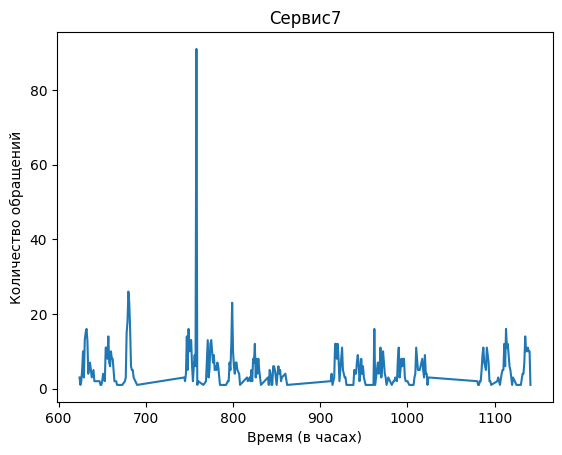

'Содержание:'

НЕ ВЫПОЛНЯТЬ ДО 05.02 Письмо Random***** Управление учетными записями Система7 на основе заявок    86
Разблокировка учётной записи                                                                        2
разблокировка УЗ REGION\*****                                                                       1
Разблокировка УЗ BOSS\*****                                                                         1
Блокировка учетной записи                                                                           1
Name: Содержание, dtype: int64

'Решение:'

Для УЗ ******* изменены атрибуты                                                                                                    44
Внесены изменения в атрибуты УЗ NE_BOSS\****** согласно приложенного файла                                                          42
Выполнена разблокировка УЗ Сервис7 *************************, пользователь идентифицирован =ОП=                                      1
Запрос отменён пользователем из портала самообслуживания                                                                             1
 Выполнена разблокировка УЗ Ne_boSS\ ********       Пользователь идентифицирован, причина блокировки пользователю не ясна            1
 Личность пользователя идентифицирована\nПричина нарушения: Другая\nВыполнена разблокировка учетной записи:  ne_Boss\***********     1
Произведена разблокировка УЗ NE_BOSS\*************  =ОП=   Ошибка персонала  Несколько раз неправильный ввод пароля                  1
Name: Решение, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------


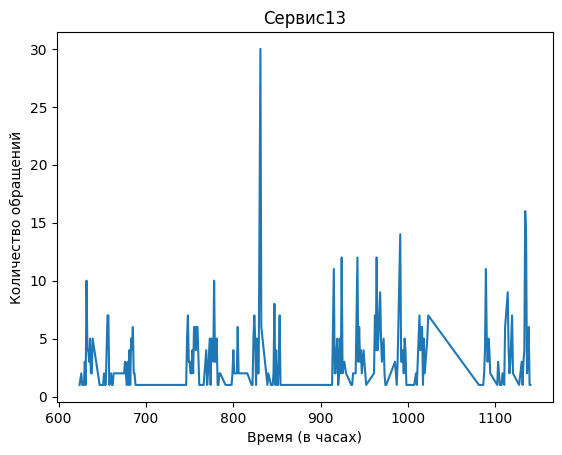

'Содержание:'

Заявка на предоставление и отзыв прав доступа к ресурсам    30
Name: Содержание, dtype: int64

'Решение:'

Работы по обращению выполнены    30
Name: Решение, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------


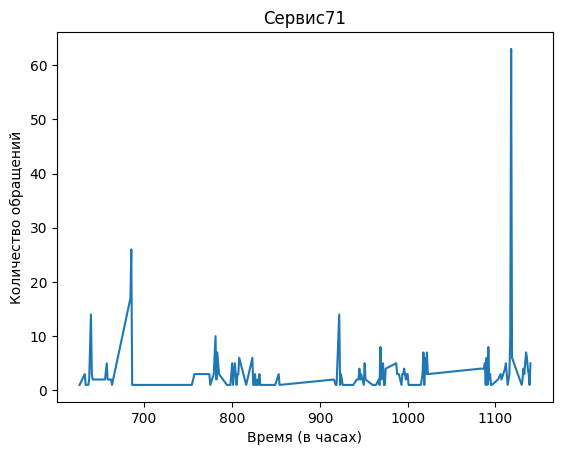

'Содержание:'

Заявка на предоставление и отзыв прав доступа к ресурсам    63
Name: Содержание, dtype: int64

'Решение:'

Работы по обращению выполнены    63
Name: Решение, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------


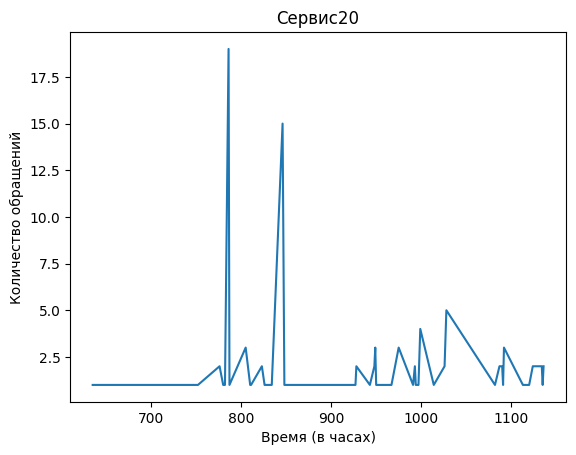

'Содержание:'

Система20    15
Name: Содержание, dtype: int64

'Решение:'

Финальный отчет загружен после повторной обработки.    15
Name: Решение, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------


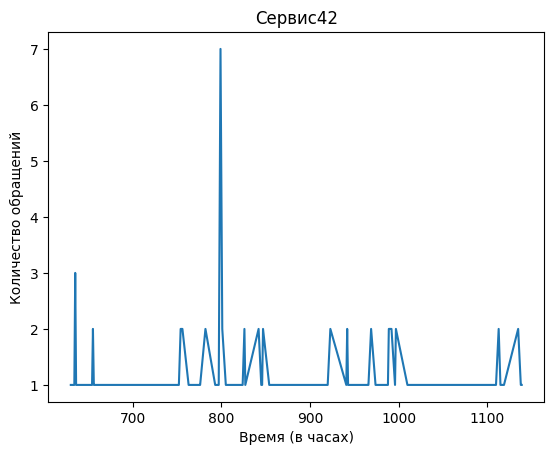

'Содержание:'

Ремонт замка                          1
Сломан дозатор жидкого мыла           1
Ремонт оконной конструкции            1
Ремонт окна                           1
Необходим ремонт дверей в кабинете    1
регулировка окна.                     1
ремонт двери                          1
Name: Содержание, dtype: int64

'Решение:'

Выполнено                             2
Исполнено. Неисправность устранена    1
исполнено                             1
Заявка исполнена.                     1
Выполнен ремонт двери                 1
Выполнено.                            1
Name: Решение, dtype: int64

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [9]:
a = train['Сервис'].value_counts()
a = a[a > 100].index

bad_info = []

for ser in a:
    df = train[(train['Сервис']==ser)].groupby('hour').size()

    threshold = df.quantile(0.95)
    bad = False
    for x in range(len(df)):
        if threshold * 2.5 < df.tolist()[x]:
            bad = True
            bad_info.append((ser, df.index.tolist()[x]))
            
    if bad:
        df.plot()
        plt.title(ser)
        plt.ylabel('Количество обращений')
        plt.xlabel('Время (в часах)')
        plt.show()
        
        cur_df = train[(train['Сервис']==ser)&(train['hour']==bad_info[-1][1])]
        display('Содержание:', cur_df['Содержание'].value_counts())
        display('Решение:', cur_df['Решение'].value_counts())
        
        print('----------------'*10)

ОСНОВНАЯ ПРОБЛЕМА ТАКИХ БОЛЬШИХ АНОМАЛИЙ - КАКОЙ-ТО СЕРВАК УПАЛ И ВСЕ ОСТАЛЬНОЕ РУШИТСЯ ЗА НИМ

In [10]:
train[(train['Критичность_num']<=2)].Система.value_counts()

Система7      1561
Система22      914
Система13      895
Система101     407
Система21      353
              ... 
Система60        1
Система190       1
Система124       1
Система162       1
Система395       1
Name: Система, Length: 108, dtype: int64

<Axes: xlabel='hour'>

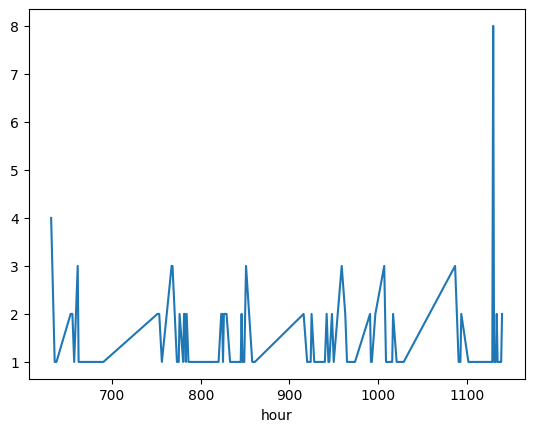

In [11]:
train[(train['Тип обращения итоговый']=='Инцидент')&(train['Критичность_num']<=2)].groupby('hour').size().plot()

In [12]:
train[(train['Тип обращения на момент подачи']=='Инцидент')&(train['Критичность_num']<=2)].groupby('day').size()

day
26     6
27    18
28    13
31    13
32    18
33    10
34    14
35    22
38    18
39    14
40     9
41    15
42    12
45    15
46     9
47    22
dtype: int64

Видно, что в районе 800-ого часа был всплеск инцидентов

<Axes: xlabel='hour'>

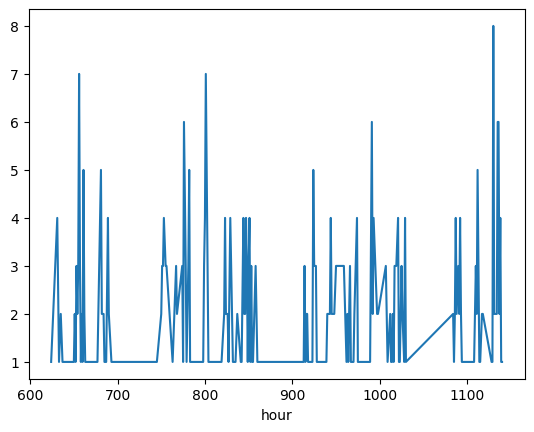

In [13]:
train[(train['Тип обращения на момент подачи']=='Инцидент')].groupby('hour').size().plot()

Судя по ошибкам можно сказать, что произошел какой-то крупный сбой, который повел за собой всю систему

In [14]:
train[(train['Тип обращения на момент подачи']=='Инцидент')&(train['hour']>=795)&(train['hour']<=807)]['Содержание'].value_counts()

Устранение ошибки                                                             3
Сообщить об ошибке/неисправности Система18                                    3
<Бот-наблюдения> Система23. Ухудшение статуса сервиса.                        1
Не может работать один или несколько Пользователей (...                       1
шумит вентилятор                                                              1
Отсутствует возможность прикрепить файл в отчет о проведении тренировки       1
 Не может работать один или несколько Пользователей (...                      1
.Не считываются пластиковые пломбы на кассетах                                1
<Бот-наблюдения> (3 ур.) Система120. Статус Серьезный.                        1
<Бот-наблюдения> (Не критич.) Система11. Статус Серьезный.                    1
Регистрация инцидента                                                         1
<Бот-наблюдения> Система23 (агент Система57). Ухудшение статуса сервиса.      1
.В Система43 не работает "Контроль ИБ"  